In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("D:\Practice\wine.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [6]:
df.describe() #Tells about the Statistical Data of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

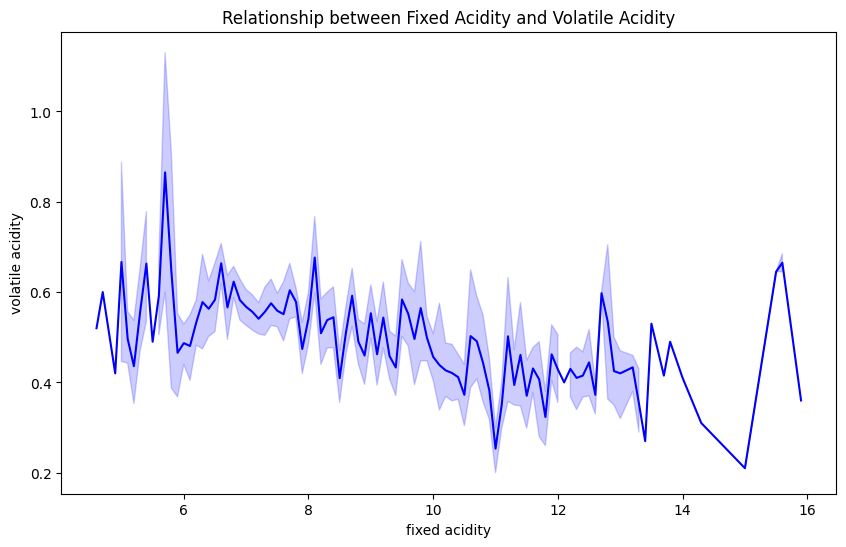

In [8]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'fixed acidity', y = 'volatile acidity', data=df, color = 'blue' )
plt.title('Relationship between Fixed Acidity and Volatile Acidity')
plt.show()

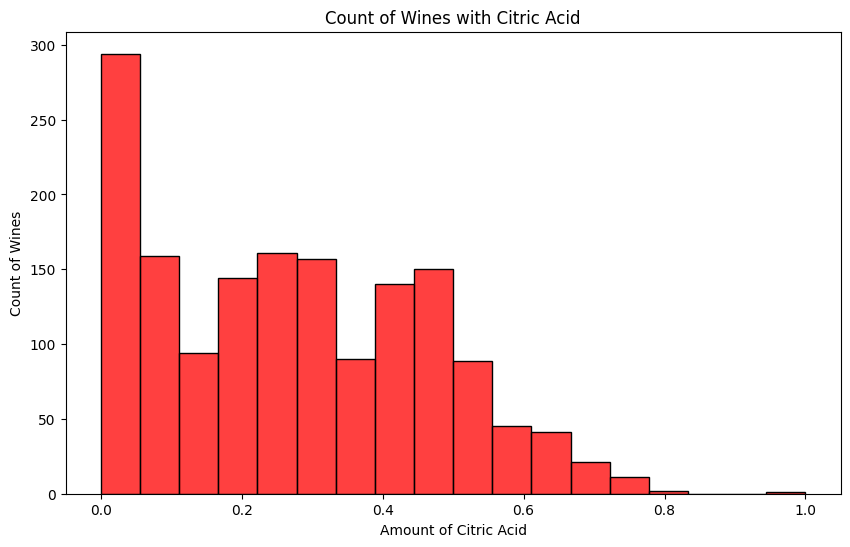

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(x = 'citric acid', data = df, color='red')
plt.title("Count of Wines with Citric Acid")
plt.xlabel("Amount of Citric Acid")
plt.ylabel("Count of Wines")
plt.show()

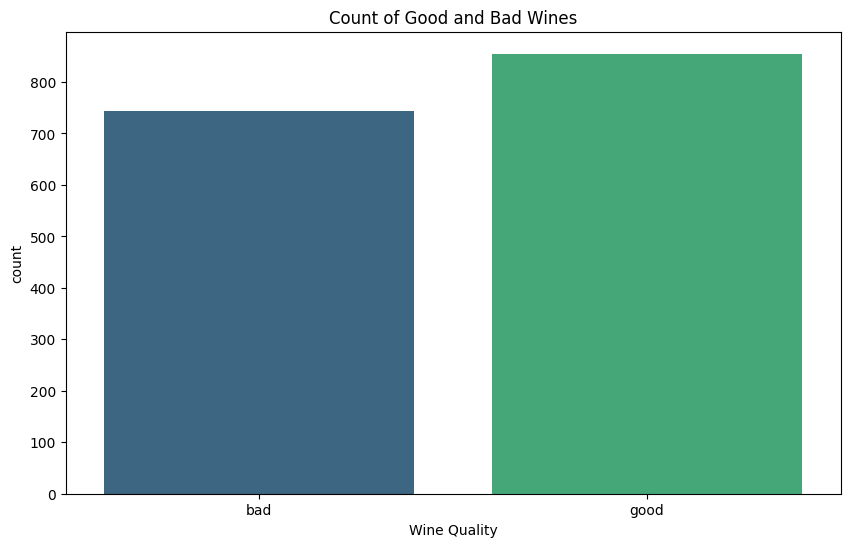

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=df, palette = 'viridis')
plt.title("Count of Good and Bad Wines")
plt.xlabel('Wine Quality')
plt.show()

#### To show how alcohol content varies with wine quality:

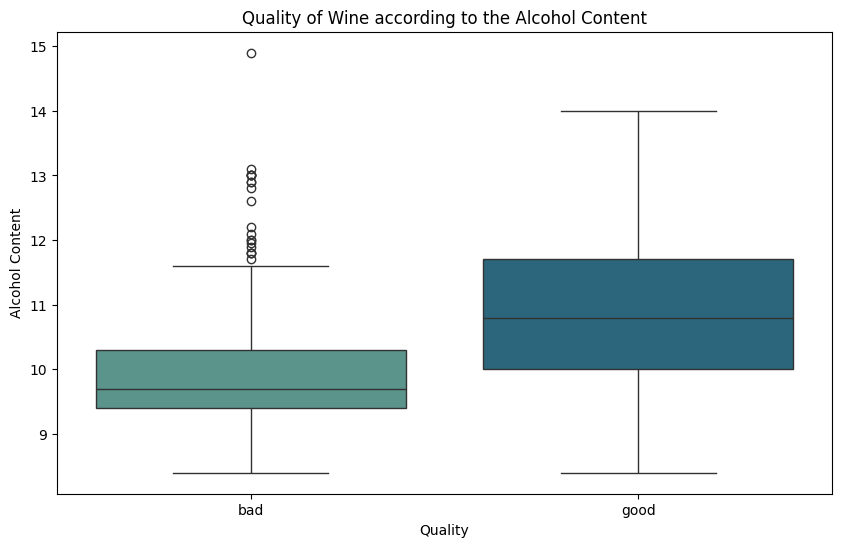

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'quality', y = 'alcohol', data = df, palette = 'crest')
plt.title("Quality of Wine according to the Alcohol Content")
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

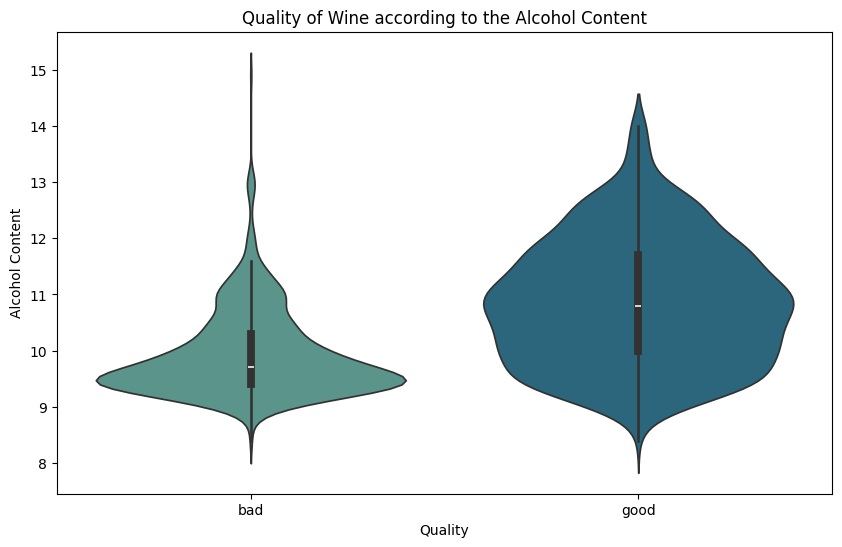

In [12]:
plt.figure(figsize=(10,6))
sns.violinplot(x = 'quality', y = 'alcohol', data = df, palette = 'crest')
plt.title("Quality of Wine according to the Alcohol Content")
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

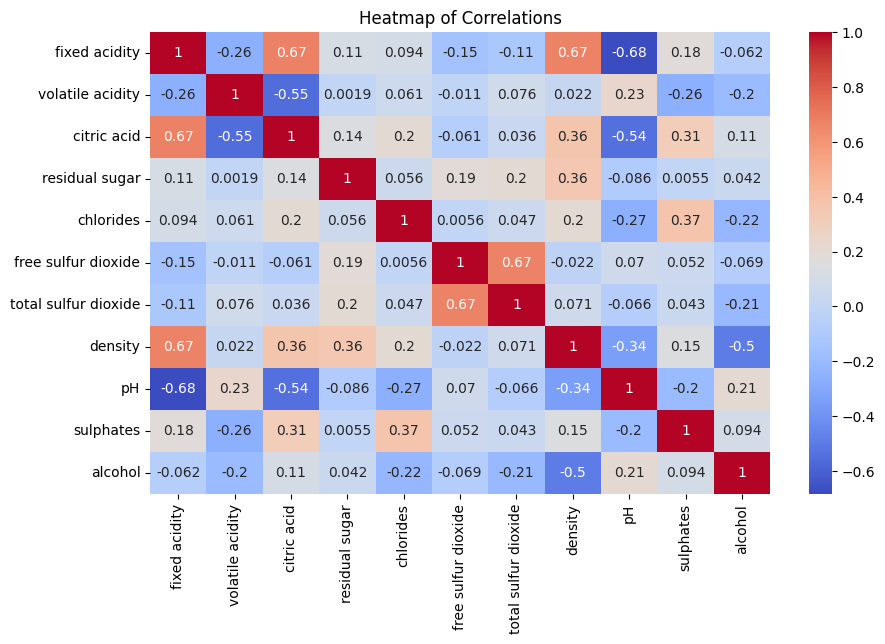

In [13]:
corr = (df.drop('quality', axis=1)).corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.title("Heatmap of Correlations")
plt.show()

In [14]:
encoder = LabelEncoder()
df['quality'] = encoder.fit_transform(df['quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [15]:
X = df.drop('quality', axis=1)
y = df['quality']

In [16]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [17]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [20]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


In [21]:
y_train.head()

493    1
354    1
342    1
834    0
705    0
Name: quality, dtype: int64

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

In [26]:
print("Accuracy Score of the Model: ", accuracy_score(y_test, y_pred))
print("Classification Report: ") 
print(classification_report(y_test, y_pred))

Accuracy Score of the Model:  0.746875
Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       141
           1       0.78      0.75      0.77       179

    accuracy                           0.75       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.75      0.75      0.75       320



In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [28]:
new_seen = [[8.7,	0.690,	0.31,	3.0,	0.086,	23.0,	81.0,	1.00020,	3.48,	0.74,	11.6]]
pred = model.predict(new_seen)
print(f"Quality of Wine (0=Bad, 1=Good) : {pred[0]}")

Quality of Wine (0=Bad, 1=Good) : 1


In [29]:
new_unseen = [[9.8,	0.800,	0.11,	2.0,	0.096,	13.0,	80.0,	0.00020,	3.00,	0.44,	9.6]]
pred = model.predict(new_unseen)
print(f"Quality of Wine (0=Bad, 1=Good) : {pred[0]}")

Quality of Wine (0=Bad, 1=Good) : 0


In [31]:
from deep_translator import GoogleTranslator

In [35]:
# List of feature names in correct order
features = [
    "fixed acidity",	"volatile acidity",	"citric acid",	"residual sugar",	"chlorides",	
    "free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol"
]

user_input = []

print("Enter Values for the Wine:")
for i in features:
    val = input(f"Enter {i} (default=0): ") or 0 
    user_input.append(float(val))

# Converting into 2D list for model
new_data = [user_input]


# Predict
pred = model.predict(new_data)
print("Predicted Quality for this Wine (0 = Bad Quality , 1 = Good Quality): ", pred)
if pred[0] == 1:
    text = "The Quality of Wine is Good"
    print(GoogleTranslator(source = 'en', target ="sanskrit").translate(text))
else:
    text = "The Quality of Wine is Bad"
    print(GoogleTranslator(source = 'en', target ="sanskrit").translate(text))

Enter Values for the Wine:


Enter fixed acidity (default=0):  8.7
Enter volatile acidity (default=0):  0.690
Enter citric acid (default=0):  0.31
Enter residual sugar (default=0):  3.0
Enter chlorides (default=0):  0.086
Enter free sulfur dioxide (default=0):  23.0
Enter total sulfur dioxide (default=0):  81.0
Enter density (default=0):  1.00020
Enter pH (default=0):  3.48
Enter sulphates (default=0):  0.74
Enter alcohol (default=0):  11.6


Predicted Quality for this Wine (0 = Bad Quality , 1 = Good Quality):  [1]
मद्यस्य गुणः उत्तमः अस्ति ।
